In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Evaluation of regression

In [5]:
#regression_results = pd.read_csv( "../results/regr_results_fingerprints_plus_feat.csv", index_col = 0)
#regression_results = pd.read_csv( "../results/multioutput/regression/regr_results_all_feat.csv", index_col = 0)
#regression_results = pd.read_csv( "../results/multioutput/regression/regr_results_fingerprints.csv", index_col = 0)
#regression_results = pd.read_csv( "../results/multioutput/regression/regr_results_mol_feat.csv", index_col = 0)

regression_results = pd.read_csv( "../results/multioutput/regression/regr_results_single_mol_feat.csv", index_col = 0)
#regression_results = regression_results.drop(columns = ['matrix', 'polarity']).rename(columns={'Matrix short': 'matrix',
#                                                                                              'Polarity': 'polarity'})
regression_results

,matrix,polarity,regressor,observed_value,prediction,name_short,adduct
0,9AA,negative,RandomForest,0.0,0.037844,2-Oxoglutaric acid,+Cl
1,9AA,positive,RandomForest,0.0,0.000233,2-Oxoglutaric acid,+Cl
2,CHCA,negative,RandomForest,0.0,0.000000,2-Oxoglutaric acid,+Cl
3,CHCA,positive,RandomForest,0.0,0.001387,2-Oxoglutaric acid,+Cl
4,CMBT,negative,RandomForest,0.0,0.000447,2-Oxoglutaric acid,+Cl
...,...,...,...,...,...,...,...
2235,NEDC,positive,RandomForest,0.0,0.000000,gamma-Aminobutyric acid,[M]-
2236,NOR,negative,RandomForest,0.0,0.000000,gamma-Aminobutyric acid,[M]-
2237,NOR,positive,RandomForest,0.0,0.000674,gamma-Aminobutyric acid,[M]-
2238,pNA,negative,RandomForest,0.0,0.003106,gamma-Aminobutyric acid,[M]-


In [6]:
import scipy.stats
from sklearn.metrics import mean_squared_error

# compute Spearman's correlation and mean squared error for
regression_metrics = pd.DataFrame(columns = ['matrix', 'polarity', 'regressor', "Spearman's R", 'S pval', 
                                             "Pearson's R", 'P pval', 'RMSE', 'RMSE/std', 'non zero int'])
counter = 0
for (matrix, polarity, regressor), rows in regression_results.groupby(['matrix', 'polarity', 'regressor']):
    spearman = scipy.stats.spearmanr(rows.observed_value, rows.prediction)
    pearson = scipy.stats.pearsonr(rows.observed_value, rows.prediction)
    mse = mean_squared_error(rows.observed_value, rows.prediction, squared = False)
    regression_metrics.loc[counter] = [matrix, polarity, regressor, spearman[0], spearman[1], 
                                       pearson[0], pearson[1],
                                       mse, mse/rows.observed_value.std(), rows[rows.observed_value!=0].shape[0]]
    # print(matrix, polarity, regressor)
    counter += 1

In [7]:
# select best regressor for each matrix/polarity combination
best_RMSE = regression_metrics.loc[regression_metrics.groupby(['matrix', 'polarity'])["RMSE"].idxmin()].sort_values("RMSE/std", ascending=False)
best_spear = regression_metrics.loc[regression_metrics.groupby(['matrix', 'polarity'])["Spearman's R"].idxmax()].sort_values("Spearman's R", ascending=False)
best_pears = regression_metrics.loc[regression_metrics.groupby(['matrix', 'polarity'])["Pearson's R"].idxmax()].sort_values("Pearson's R", ascending=False)

best_spear
# best_RMSE


,matrix,polarity,regressor,Spearman's R,S pval,Pearson's R,P pval,RMSE,RMSE/std,non zero int
13,DHB,positive,RandomForest,0.664656,1.088348e-151,0.507821,1.490361e-78,0.778059,0.865723,382
3,CHCA,positive,RandomForest,0.633359,1.182496e-133,0.476547,4.210241e-68,0.804096,0.882126,355
7,ClCCA,positive,RandomForest,0.633354,1.188915e-133,0.386546,1.879182e-43,0.497642,0.933734,365
0,9AA,negative,RandomForest,0.588918,2.344698e-111,0.692330,1.444203e-169,0.761998,0.721794,167
8,DAN,negative,RandomForest,0.558733,4.421307e-98,0.521455,1.844896e-83,0.430729,0.858487,155
2,CHCA,negative,RandomForest,0.554647,2.184481e-96,0.415352,1.521583e-50,0.372067,0.937660,79
16,NOR,negative,RandomForest,0.546376,4.975785e-93,0.600947,4.780139e-117,0.588227,0.801909,149
11,DHAP,positive,RandomForest,0.542435,1.836956e-91,0.413044,5.977747e-50,0.389261,0.936487,275
5,CMBT,positive,RandomForest,0.527921,7.238215e-86,0.383587,9.192831e-43,0.558680,0.943468,272
19,pNA,positive,RandomForest,0.521812,1.363073e-83,0.362069,5.860163e-38,0.666662,0.944115,274


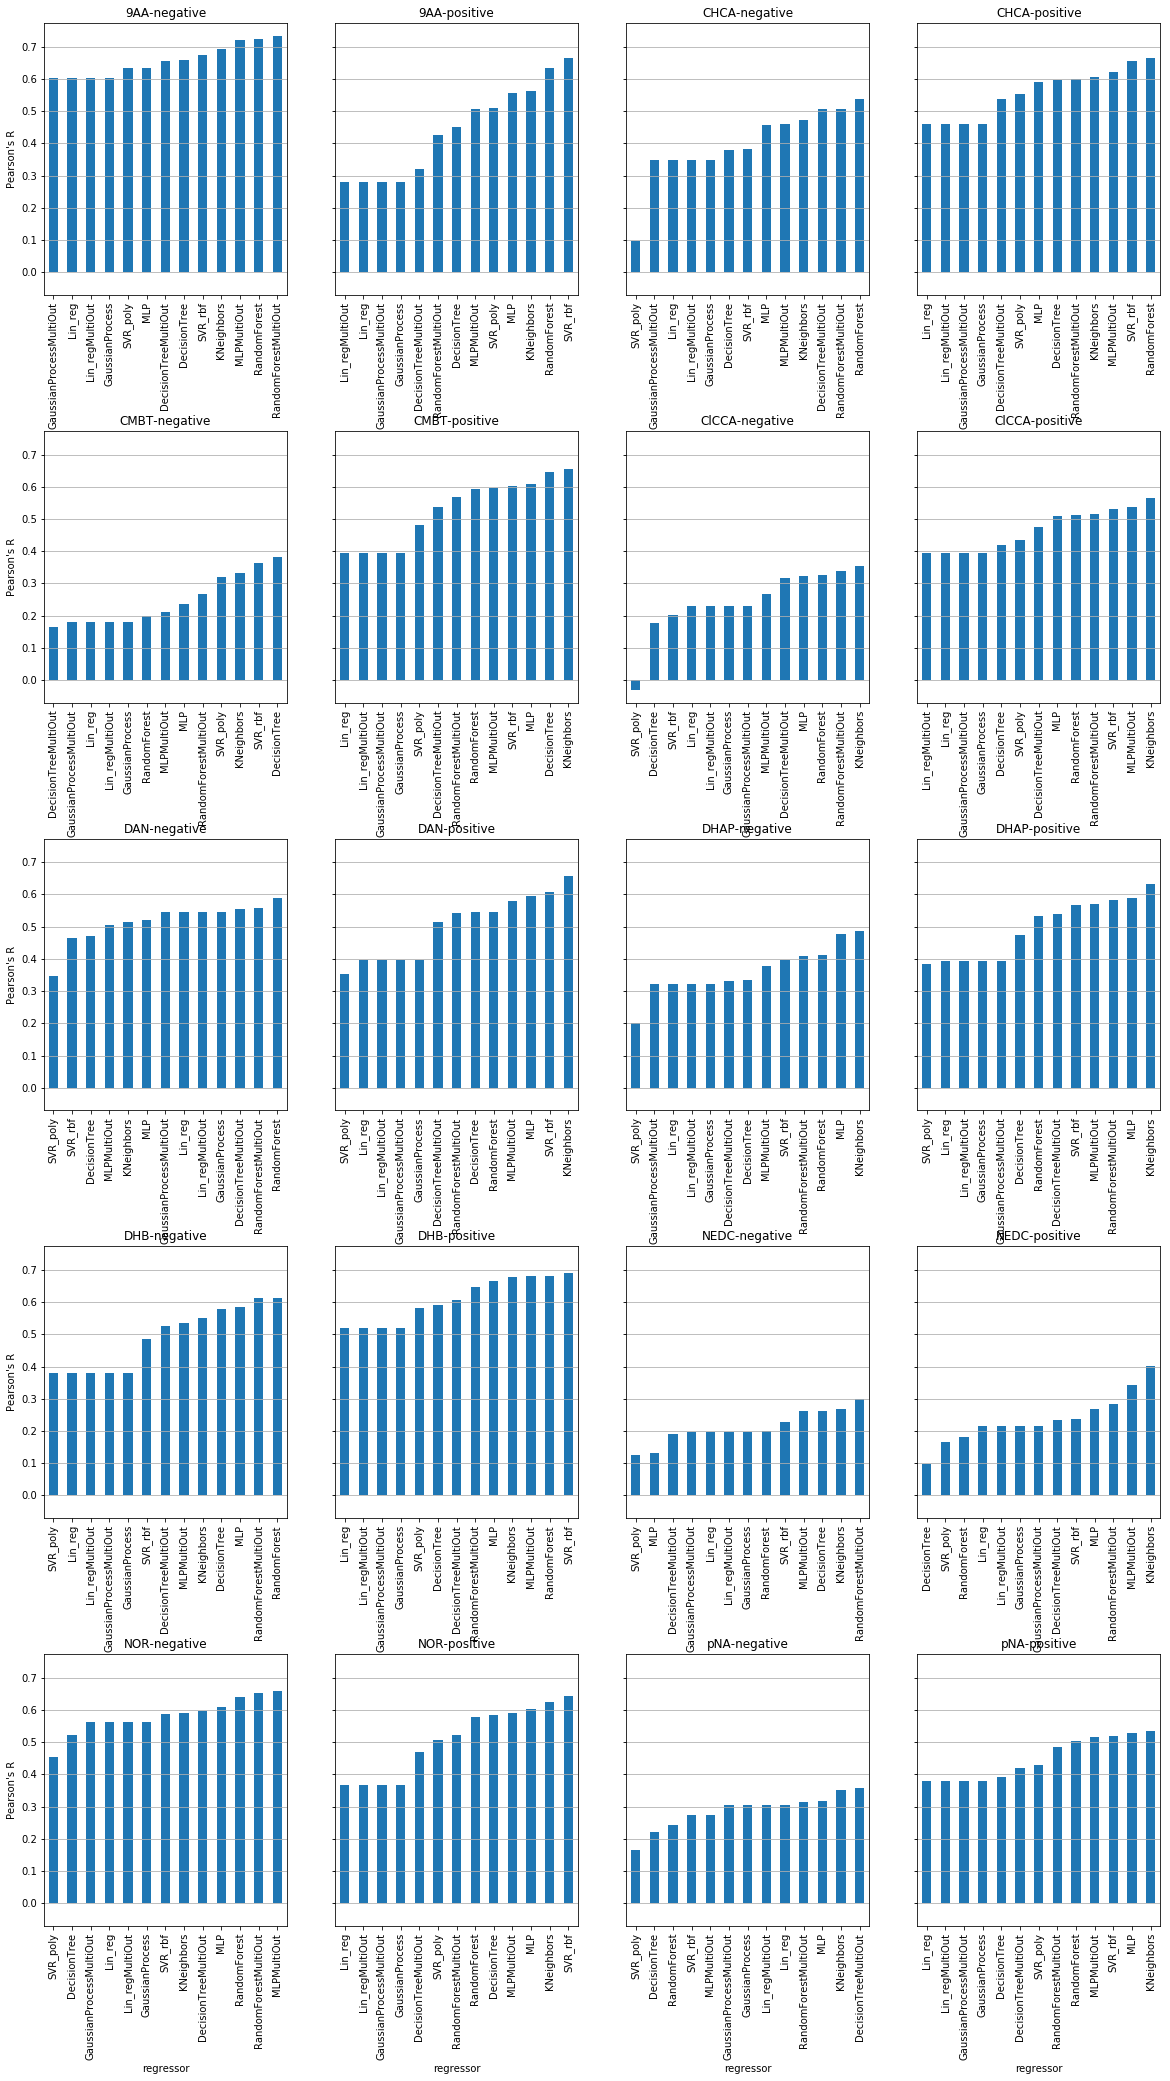

In [79]:
fig, axes = plt.subplots(ncols=4,nrows=5, sharey=True, figsize= (20, 35))
ax_list = axes.flat

#metric = "Spearman's R"
metric = "Pearson's R"
#metric = "RMSE"

i = 0
for (matrix, polarity), rows in regression_metrics.groupby(['matrix', 'polarity']):
    rows = rows.set_index('regressor', drop = True).sort_values( by = metric)
    rows[metric].plot.bar(ax = ax_list[i], title=f"{matrix}-{polarity}")
    ax_list[i].set_ylabel(metric)
    ax_list[i].grid(axis='y')
    i+=1

plt.subplots_adjust(hspace=0.5)
    
plt.show()

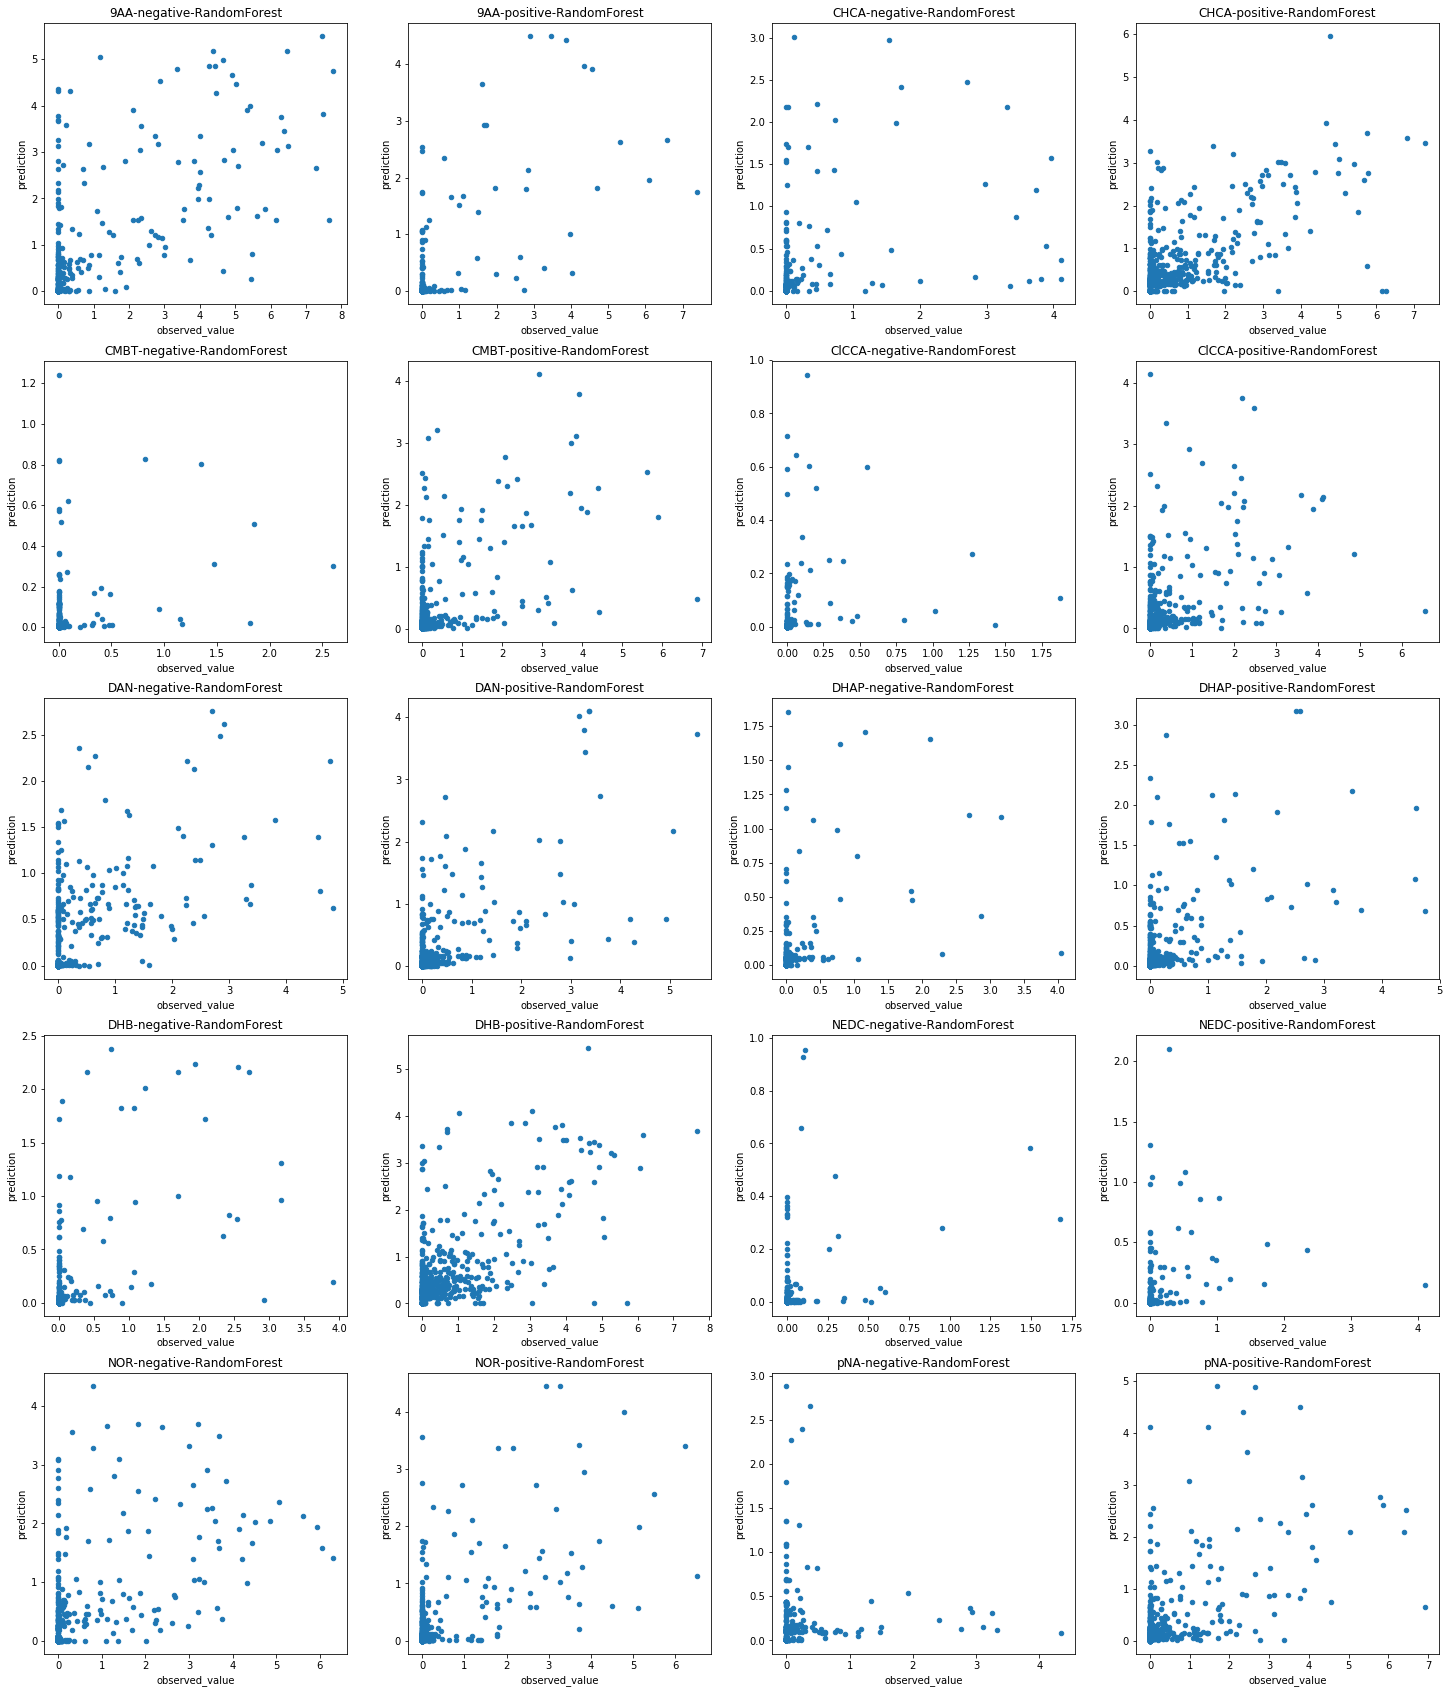

In [70]:
fig, axes = plt.subplots(ncols=4,nrows=5, figsize= (25, 30))
ax_list = axes.flat

regressor = "RandomForest"

i = 0
for (matrix, polarity), rows in regression_results.groupby(['matrix', 'polarity']):
    rows[rows.regressor == regressor].plot.scatter(x = 'observed_value', y= 'prediction',
                                                   ax = ax_list[i], title=f"{matrix}-{polarity}-{regressor}")
    i+=1
    
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

## Evaluation of classification

In [91]:
detection_results = pd.read_csv( "../results/multioutput/detection/detection_results_all_feat.csv", index_col = 0)
detection_results = detection_results.rename(columns={'Matrix short': 'matrix',
                                                      'Polarity': 'polarity'})
detection_results

,matrix,polarity,regressor,observed_value,prediction,name_short,adduct
0,9AA,negative,Logistic_reg,0,0,2-Oxoglutaric acid,+Cl
1,9AA,positive,Logistic_reg,0,0,2-Oxoglutaric acid,+Cl
2,CHCA,negative,Logistic_reg,0,0,2-Oxoglutaric acid,+Cl
3,CHCA,positive,Logistic_reg,0,0,2-Oxoglutaric acid,+Cl
4,CMBT,negative,Logistic_reg,0,0,2-Oxoglutaric acid,+Cl
...,...,...,...,...,...,...,...
46195,NEDC,positive,MLPMultiOut,0,0,gamma-Aminobutyric acid,[M]-
46196,NOR,negative,MLPMultiOut,0,0,gamma-Aminobutyric acid,[M]-
46197,NOR,positive,MLPMultiOut,0,0,gamma-Aminobutyric acid,[M]-
46198,pNA,negative,MLPMultiOut,0,0,gamma-Aminobutyric acid,[M]-


In [97]:
from sklearn.metrics import classification_report

detection_metrics = pd.DataFrame(columns = ['matrix', 'polarity', 'classifier', 
                                            'not_det_precision', 'not_det_recall', 'not_det_f1', 'not_detected',
                                            'det_precision', 'det_recall', 'det_f1', 'detected',
                                           ])
counter = 0
for (matrix, polarity, classifier), rows in detection_results.groupby(['matrix', 'polarity', 'regressor']):
    clf_report = classification_report(rows.observed_value, rows.prediction, output_dict = True)
    detection_metrics.loc[counter] = [matrix, polarity, classifier,
                                      clf_report['0']['precision'], clf_report['0']['recall'],
                                      clf_report['0']['f1-score'], clf_report['0']['support'],
                                      clf_report['1']['precision'], clf_report['1']['recall'],
                                      clf_report['1']['f1-score'], clf_report['1']['support'],]
    counter += 1
detection_metrics

/home/katya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/katya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/katya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/katya/anaconda3/lib/python3.

/home/katya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/katya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/katya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/katya/anaconda3/lib/python3.

/home/katya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/katya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/katya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/katya/anaconda3/lib/python3.

,matrix,polarity,classifier,not_det_precision,not_det_recall,not_det_f1,not_detected,det_precision,det_recall,det_f1,detected
0,9AA,negative,DecisionTree,0.961464,0.967054,0.964251,1032,0.765517,0.735099,0.750000,151
1,9AA,negative,DecisionTreeMultiOut,0.953422,0.971899,0.962572,1032,0.778626,0.675497,0.723404,151
2,9AA,negative,KNeighbors,0.872989,0.999031,0.931767,1032,0.500000,0.006623,0.013072,151
3,9AA,negative,Logistic_reg,0.944015,0.947674,0.945841,1032,0.632653,0.615894,0.624161,151
4,9AA,negative,MLP,0.956618,0.833333,0.890730,1032,0.394366,0.741722,0.514943,151
...,...,...,...,...,...,...,...,...,...,...,...
195,pNA,positive,MLPMultiOut,0.896515,0.894626,0.895570,949,0.576271,0.581197,0.578723,234
196,pNA,positive,RandomForest,0.805438,0.998946,0.891816,949,0.833333,0.021368,0.041667,234
197,pNA,positive,RandomForestMultiOut,0.807660,1.000000,0.893597,949,1.000000,0.034188,0.066116,234
198,pNA,positive,SVC_poly,0.896236,0.928346,0.912008,949,0.660000,0.564103,0.608295,234


In [100]:
best_det_f1 = detection_metrics.loc[detection_metrics.groupby(['matrix', 'polarity'])["det_f1"].idxmax()].sort_values("det_f1", ascending=False)
best_det_f1

,matrix,polarity,classifier,not_det_precision,not_det_recall,not_det_f1,not_detected,det_precision,det_recall,det_f1,detected
131,DHB,positive,DecisionTreeMultiOut,0.884916,0.943981,0.913495,839,0.836806,0.700581,0.762658,344
0,9AA,negative,DecisionTree,0.961464,0.967054,0.964251,1032,0.765517,0.735099,0.750000,151
30,CHCA,positive,DecisionTree,0.908127,0.888249,0.898078,868,0.709581,0.752381,0.730354,315
80,DAN,negative,DecisionTree,0.965418,0.960803,0.963105,1046,0.711268,0.737226,0.724014,137
21,CHCA,negative,DecisionTreeMultiOut,0.984712,0.980304,0.982503,1117,0.690141,0.742424,0.715328,66
71,ClCCA,positive,DecisionTreeMultiOut,0.907469,0.905451,0.906459,899,0.702797,0.707746,0.705263,284
121,DHB,negative,DecisionTreeMultiOut,0.987410,0.977738,0.982550,1123,0.647887,0.766667,0.702290,60
161,NOR,negative,DecisionTreeMultiOut,0.958373,0.966603,0.962470,1048,0.722222,0.674074,0.697318,135
190,pNA,positive,DecisionTree,0.924388,0.914647,0.919492,949,0.668033,0.696581,0.682008,234
63,ClCCA,negative,Logistic_reg,0.986219,0.995652,0.990913,1150,0.772727,0.515152,0.618182,33


In [ ]:
fig, axes = plt.subplots(ncols=4,nrows=5, figsize= (25, 30))
ax_list = axes.flat

regressor = "DecisionTreeMultiOut"

i = 0
for row in detection_metrics[detection_metrics.classifier == classifier].iterrows():
    
    i+=1
    
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()